In [5]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [16]:
from wordcloud import STOPWORDS

In [2]:
df=pd.read_csv("AccidentesAviones.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5008 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [6]:
df.sample(15)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
4115,4115,"October 29, 1997",?,"Jalal-Abad, Afghanistan",Ariana Afghan Airlines,?,?,Yakovlev YAK-40,YA-KAE,9441037,26,20,6,2,2,0,0,Crashed during a landing attempt.
2181,2181,"September 16, 1965",1102,"Near Pastaza, Ecuador",TAO,?,Coca - Pastaza,Transportes Aéreos Orientales,HC-AFQ,17009/34272,11,8,3,9,6,3,0,Crashed while en route.
532,532,"October 10, 1938",1100,"Soest, Germany",Sabena,?,Brussels - Düsseldorf - Berlin,Savbia-Marchetti S-73P,OO-AGT,4,20,16,4,20,16,4,0,The aircraft broke-up in midair and crashed to...
4257,4257,"March 09, 2000",0840,"Moscow, Russia",Vologodskiye Airlines,?,Moscow - Kiev,Yakovlev YAK-40,RA-88170,9620847,9,4,5,9,4,5,0,The aircraft climbed to an altitude of about 1...
571,571,"November 20, 1939",?,"Gosport, England",British Airways,?,Training,Airspeed Oxford,G-AFFM,75,2,0,2,2,0,2,?,Collided with the mooring of a ballon.went out...
2854,2854,"May 05, 1976",?,"Camuigan, Philippines",Philippine Aerotransport,?,?,Britten-Norman BN-2A-21 Islander,RP-C2140,450,10,8,2,4,4,0,0,Unknown cause.
3600,3600,"October 26, 1989",?,"Petropavlovsk, USSR",Military - Soviet Air Force,?,?,Antonov AN-26,09,?,36,30,6,36,30,6,0,Crashed while attempting to land in poor weath...
3763,3763,"April 22, 1992",1553,"Mt. Haleakala, Hawaii",Scenic Air Tours,22,Local sightseeing,Beechcraft E18S,N342E,BA-308,9,8,1,9,8,1,0,During a sight seeing tour the aircraft hit a ...
4818,4818,"September 06, 2011",1850,"Near Trinidad, Bolivia",Aerocon,A4-238,"Santa Cruz - Trinidad, Bolivia",Swearingen SA-227BC Metroliner III,CP-2548,BC-768B,9,7,2,8,6,2,0,The plane crashed into the jungle while on app...
2014,2014,"January 14, 1963",2338,"Kaktovik (Barter Island), Alaska",Wien,?,Perry Island - Kaktovik,Beechcraft AT-11 Kansan,N65458,4084,6,5,1,5,4,1,0,"While on approach to Kaktovik Airport, the pil..."


1 Crear columna cantidad % de sobrevivientes (1-(Total muertos/total personas en vuelo )) 
Metrica de cantidad de personas muertas ground
2 Columnas basura flight_no, registration,unnamed
Accidentes con mas muertes en ground
Accidente con mas muertos
palabras mas repetidas en summary

In [7]:
df = df.drop(['flight_no','registration','cn_ln'], axis=1)

In [11]:
df = df.rename(columns={
    'fecha': 'Date',
    'HORA declarada': 'Local_Time',
    'OperadOR': 'Operator',
    'PASAJEROS A BORDO': 'Passengers_aboard',
    'cantidad de fallecidos': 'Total_fatalities',
    'all_aboard': 'All_aboard',
    'crew_aboard': 'Crew_aboard',
   'passenger_fatalities': 'Passenger_fatalities',
    'crew_fatalities': 'Crew_fatalities',
    'ground': 'Ground',
    'summary': 'Summary',
    'ac_type': 'Aircraft_type',
    'route': 'Flight_type',
    'Ruta': 'Route',
    })

In [12]:
df.head(10)

,Unnamed: 0,Date,Local_Time,Route,Operator,Flight_type,Aircraft_type,All_aboard,Passengers_aboard,Crew_aboard,Total_fatalities,Passenger_fatalities,Crew_fatalities,Ground,Summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,Air show,Wright Byplane,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,Curtiss seaplane,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,Zeppelin L-1 (airship),20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
5,5,"October 17, 1913",1030,"Near Johannisthal, Germany",Military - German Navy,?,Zeppelin L-2 (airship),28,?,?,28,?,?,0,Hydrogen gas which was being vented was sucked...
6,6,"March 05, 1915",0100,"Tienen, Belgium",Military - German Navy,?,Zeppelin L-8 (airship),41,0,41,17,0,17,0,Crashed into trees while attempting to land af...
7,7,"September 03, 1915",1520,"Off Cuxhaven, Germany",Military - German Navy,?,Zeppelin L-10 (airship),19,?,?,19,?,?,0,"Exploded and burned near Neuwerk Island, when..."
8,8,"July 28, 1916",?,"Near Jambol, Bulgeria",Military - German Army,?,Schutte-Lanz S-L-10 (airship),20,?,?,20,?,?,0,"Crashed near the Black Sea, cause unknown."
9,9,"September 24, 1916",0100,"Billericay, England",Military - German Navy,?,Zeppelin L-32 (airship),22,?,?,22,?,?,0,Shot down by British aircraft crashing in flames.


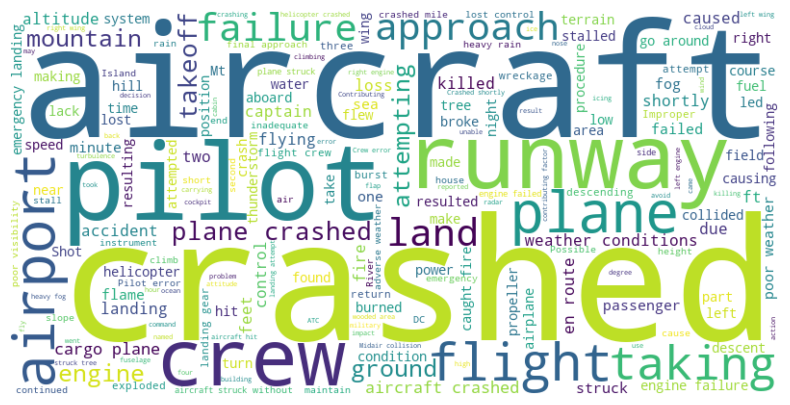

In [15]:
# Concatenar todas las descripciones de los accidentes en un solo texto
text = ' '.join(df['Summary'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar el wordcloud utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# Concatenar todas las descripciones de los accidentes en un solo texto
text = ' '.join(df['Summary'])
# Crear un diccionario para almacenar el recuento de palabras
word_count = {}
# Dividir el texto en palabras
words = text.split()
# Contar la frecuencia de cada palabra
for word in words:
    # Excluir las palabras en STOPWORDS (palabras comunes que no agregan mucho significado)
    if word.lower() not in STOPWORDS and len(word) > 2:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
# Crear un DataFrame a partir del diccionario de recuento de palabras
word_count_df = pd.DataFrame({'Word': list(word_count.keys()), 'Count': list(word_count.values())})
# Ordenar el DataFrame por el recuento de palabras en orden descendente
word_count_df = word_count_df.sort_values(by='Count', ascending=False)

In [21]:
print(word_count_df.head(15))

         Word  Count
143  aircraft   2294
171     plane   2086
153   crashed   2024
122   Crashed   1073
224    flight    887
206      crew    842
104    engine    800
51      pilot    777
265  approach    667
246   landing    605
274    taking    603
882    runway    587
272   failure    535
281     cargo    507
35    control    503


In [24]:
aircraft_type_count = df['Aircraft_type'].value_counts().reset_index()
# Renombrar las columnas del DataFrame resultante
aircraft_type_count.columns = ['Aircraft_type', 'Count']
aircraft_type_count.head(15)

,Aircraft_type,Count
0,Douglas DC-3,333
1,de Havilland Canada DHC-6 Twin Otter 300,81
2,Douglas C-47A,70
3,Douglas C-47,64
4,Douglas DC-4,41
5,Antonov AN-26,35
6,Yakovlev YAK-40,35
7,Junkers JU-52/3m,30
8,De Havilland DH-4,27
9,Douglas C-47B,27


In [25]:
# Filtrar las filas que no contienen "?" en la columna 'Operator'
filtered_df = df[df['Operator'] != '?']
operator_count = filtered_df['Operator'].value_counts().reset_index()
operator_count.columns = ['Operator', 'Count']
operator_count.head(15)

,Operator,Count
0,Aeroflot,253
1,Military - U.S. Air Force,141
2,Air France,74
3,Deutsche Lufthansa,63
4,United Air Lines,44
5,Military - U.S. Army Air Forces,43
6,China National Aviation Corporation,43
7,Pan American World Airways,41
8,American Airlines,37
9,US Aerial Mail Service,35


In [27]:
# Convertir la columna 'Date' al tipo de dato datetime
df['Date'] = pd.to_datetime(df['Date'])
# Crear una nueva columna 'año' con el año del evento
df['Year'] = df['Date'].dt.year
# Crear un DataFrame que muestre los eventos en cada año
eventos_por_año = df['Year'].value_counts().reset_index()
eventos_por_año.columns = ['Year', 'Cantidad_de_eventos']

# Crear un DataFrame que muestre los eventos en cada mes
eventos_por_mes = df['Date'].dt.month.value_counts().reset_index()
eventos_por_mes.columns = ['Month', 'Cantidad_de_eventos']

In [28]:
# Mostrar el DataFrame de eventos por año
eventos_por_año.head(15)

,Year,Cantidad_de_eventos
0,1946,88
1,1989,83
2,1947,82
3,1948,78
4,1962,78
5,1972,77
6,1945,75
7,1951,75
8,1994,74
9,1970,73


In [29]:
# Mostrar el DataFrame de eventos por mes
eventos_por_mes.head(15)

,Month,Cantidad_de_eventos
0,12,496
1,1,460
2,9,451
3,8,451
4,11,439
5,10,427
6,3,426
7,7,425
8,6,366
9,2,360


In [34]:
df.sample(5)

,Date,Local_Time,Route,Operator,Flight_type,Aircraft_type,All_aboard,Passengers_aboard,Crew_aboard,Total_fatalities,Passenger_fatalities,Crew_fatalities,Ground,Summary,Year
3703,1991-05-24,?,"Bakhtaran, Iran",Metro Cargo,Cologne-Bakhtaran,Ilyushin 76TD,10,0,10,4,0,4,0,After three missed approaches the cargo plane ...,1991
4163,1998-08-24,1646,"Pretoria, South Africa",Speed Service Couriers,Pretoria - Durban,DC-3-65TP,2,0,2,1,0,1,0,"The cargo plane took off in a steep angle, rol...",1998
4500,2004-05-23,0730,"Mwingi, Kenya",Blue Bird Aviation,Nairobi - Mogadiscio,Let 410UVP,2,0,2,2,0,2,0,While en route the cargo plane collided with a...,2004
1859,1960-09-29,1215,"Off Elba, Italy",United Arab Airlines,Geneva - Rome,Vickers Viscount 739B,21,17,4,21,17,4,0,Crashed into the Tyrrhenian Sea off Elba afte...,1960
1020,1948-02-10,1630,"Near Padalarang, Indonesia",KLM Royal Dutch Airlines,Bandung - Jakarta - Banjoemans - Semarang,Douglas DC-3,19,15,4,19,15,4,0,Crashed and burned on the island of Java. The ...,1948


In [33]:
df = df.drop(['Unnamed: 0'], axis=1)